In [145]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random
import os

data = pd.read_csv("Life Expectancy Data.csv")


data.dropna(subset = ['Life expectancy '], inplace = True)

data.shape

(2928, 22)

In [125]:
GDP_data = pd.read_csv("GDP.csv", header = 4)

#GDP_data.head()

In [126]:
country_labels = pd.read_csv("CountryNames.csv")

#country_labels.head(30)

In [127]:
i = 0
for index, row in GDP_data.iterrows():
    try:
        mask = row['Country Name'] == country_labels['Country']    
        x = country_labels[mask]['Target Name'].values[0]
        GDP_data.at[index, 'Country Name'] = x
    
    except:    
        continue

#GDP_data.tail()

In [91]:
#data[['Year']].value_counts()

In [92]:
#data[['Country']].value_counts()

In [128]:

for index, row in data.iterrows():
    try:
        mask = GDP_data['Country Name'] == row['Country']     
        x = GDP_data[mask][str(row['Year'])].values[0]
        data.at[index, 'New GDP'] = x
    
    except:
    
        continue


data['New GDP'].isna().value_counts(normalize=True)
#data[data['New GDP']. isna()][['Country', 'Year']]
#data.head(20)

#data['New GDP'].value_counts

False    0.967555
True     0.032445
Name: New GDP, dtype: float64

In [111]:
#data['GDP'].isna().value_counts(normalize=True)

In [119]:
GDP_clean_set = data[data['New GDP'].notnull()]

GDP_clean_set.shape

(2833, 23)

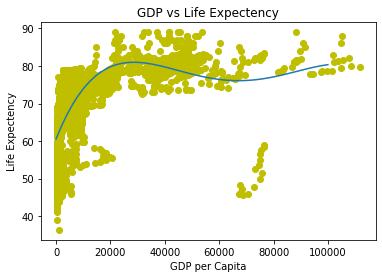

In [153]:
#colors=np.random.rand(2833)

plt.scatter(GDP_clean_set['New GDP'],GDP_clean_set['Life expectancy '], color = 'y')

model = np.poly1d(np.polyfit(GDP_clean_set['New GDP'], GDP_clean_set['Life expectancy '], 4))
#print(model)
polyline = np.linspace(0,100000)
plt.plot(polyline, model(polyline))

plt.title('GDP vs Life Expectency')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectency')
plt.savefig('GDP.jpg')
plt.show()